In [1]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import math
#for removing warnings
import warnings

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path = 's3://velocity-u.zarr/'
remote_files = fsg.glob(data_path)

store = s3fs.S3Map(root=data_path, s3=fsg, check=False)
du = xr.open_zarr(store=store, consolidated=True)
du = du.rename({'depthu' : 'depth'})
du 

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depth: 75, time_counter: 73, x: 1580, y: 1801)
Coordinates:
  * depth                 (depth) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    nav_lat               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    time_centered         (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
  * time_counter          (time_counter) object 2000-01-03 12:00:00 ... 2000-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    depthu_bounds         (time_counter, depth, axis_nbounds) float32 dask.array<chunksize=(1, 75, 2), meta=np.ndarray>
    sozotaux              (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    utau_atmoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    utau_iceoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    uwspd10               (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    vozocrtx              (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
Attributes:
    CASE:              REF08
    CONFIG:            CREG12.L75
    Conventions:       CF-1.5
    description:       ocean U grid variables
    name:              /scratch/cnt0028/lpo7420/talandic/CREG12.L75-REF08-XIO...
    output_frequency:  5d
    production:        An IPSL model
    start_date:        19790101
    timeStamp:         2020-May-14 08:39:48 CEST
    title:             ocean U grid variables

In [3]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path = 's3://velocity-v.zarr/'
remote_files = fsg.glob(data_path)

store = s3fs.S3Map(root=data_path, s3=fsg, check=False)
dv = xr.open_zarr(store=store, consolidated=True)
dv = dv.rename({'depthv' : 'depth'})
dv

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depth: 75, time_counter: 73, x: 1580, y: 1801)
Coordinates:
  * depth                 (depth) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    nav_lat               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    time_centered         (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
  * time_counter          (time_counter) object 2000-01-03 12:00:00 ... 2000-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    depthv_bounds         (time_counter, depth, axis_nbounds) float32 dask.array<chunksize=(1, 75, 2), meta=np.ndarray>
    sometauy              (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    vomecrty              (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
    vtau_atmoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    vtau_iceoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    vwspd10               (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
Attributes:
    CASE:              REF08
    CONFIG:            CREG12.L75
    Conventions:       CF-1.5
    description:       ocean V grid variables
    name:              /scratch/cnt0028/lpo7420/talandic/CREG12.L75-REF08-XIO...
    output_frequency:  5d
    production:        An IPSL model
    start_date:        19790101
    timeStamp:         2020-May-14 08:39:49 CEST
    title:             ocean V grid variables

In [4]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}/*'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, combine='by_coords',compat='override')
    # rename variabel
    dset = dset.rename({'__xarray_dataarray_variable__' : 'vel'})
    return dset

In [5]:
ds = open_s3fs('PC-data')

In [6]:
u = du.vozocrtx.isel(y=slice(900,1800), x=slice(200,1400))
v = dv.vomecrty.isel(y=slice(900,1800), x=slice(200,1400))
mbathy = ds.mbathy.isel(y=slice(900,1800), x=slice(200,1400))

# Ser på U data alene

Da har jeg 73 variabler. 
Om jeg er på U og V har jeg 2*73=146 variabler

### Loopet over hele området 

Dette skal per def funke, men stort dataset og lite minne er det ikke sikkert det går.. 

### Note til meg selv: 
Hva ønsker jeg å finne?
- PC1 i verticalen for alle punkter i griddsystemet? Eller flere PCX også?
- Bare eigenvalues siden vi ikke trenger retningen? 


In [19]:
'List over the fist prinsipal components for all depths '
PC11 = []
PC12 = []
dybde = []
x_l = []
y_l = []

'does this make the loop go faster?'
lenx = np.arange(0,1200)
leny = np.arange(0,900)

'limit for how short the depth matrix can be'
limit = np.zeros((73,2))

PC11 = np.zeros((1200,900))
PC12 = np.zeros((1200,900))
x_l = np.zeros((1200,900))
y_l = np.zeros((1200,900))
dybde = np.zeros((1200,900))

'Looping over the area, x,y '
for x in lenx:
    for y in leny:
        d = mbathy.isel(x=x,y=y).values # henter nivået for bunn i punktet
        
        if d<= 2:
            PC11[x,y] = np.nan
            PC12[x,y] = np.nan
            x_l[x,y] = np.nan
            y_l[x,y] = np.nan
            dybde[x,y] = np.nan
        else:
            'Making a U-matrix with all 73 timestep as variables and all depths as samples'
            dyp = u.isel(x=x, y=y, depth = slice(0,d-1,10)) # -1 pga d=0 og vi vil en opp der vi har bunnhastigheter
            
            if dyp.shape < limit.shape:
                PC11[x,y] = np.nan
                PC12[x,y] = np.nan
                x_l[x,y] = np.nan
                y_l[x,y] = np.nan
                dybde[x,y] = np.nan
            else: 
                cov_d = np.cov(dyp.T, bias=True) # uten .T ble den en 73x73 matrise, vil ha depthxdepth
                values, vectors = np.linalg.eig(cov_d)
                order = values.argsort()[::-1]
                values, vectors = values[order], vectors[:, order]

            
            '''
            PC11.append(vectors[0,0]*np.sqrt(values[0]))
            PC12.append(vectors[1,0]*np.sqrt(values[0]))
            dybde.append(d-1)
            x_l.append(x)
            y_l.append(y)
            '''
            
            PC11[x,y] = vectors[0,0]*np.sqrt(values[0])
            PC12[x,y] = vectors[1,0]*np.sqrt(values[0])
            x_l[x,y] = x
            y_l[x,y] = y
            dybde[x,y] = d-1
            
        print('y=', y, ' ferdig')
    print('x=', x, ' ferdig')


y= 0  ferdig
y= 1  ferdig
y= 2  ferdig
y= 3  ferdig
y= 4  ferdig
y= 5  ferdig
y= 6  ferdig
y= 7  ferdig
y= 8  ferdig
y= 9  ferdig
y= 10  ferdig
y= 11  ferdig
y= 12  ferdig
y= 13  ferdig
y= 14  ferdig
y= 15  ferdig
y= 16  ferdig
y= 17  ferdig
y= 18  ferdig
y= 19  ferdig
y= 20  ferdig
y= 21  ferdig
y= 22  ferdig
y= 23  ferdig
y= 24  ferdig
y= 25  ferdig
y= 26  ferdig
y= 27  ferdig
y= 28  ferdig
y= 29  ferdig
y= 30  ferdig
y= 31  ferdig
y= 32  ferdig
y= 33  ferdig
y= 34  ferdig
y= 35  ferdig
y= 36  ferdig
y= 37  ferdig
y= 38  ferdig
y= 39  ferdig
y= 40  ferdig
y= 41  ferdig
y= 42  ferdig
y= 43  ferdig
y= 44  ferdig
y= 45  ferdig
y= 46  ferdig
y= 47  ferdig
y= 48  ferdig
y= 49  ferdig
y= 50  ferdig
y= 51  ferdig
y= 52  ferdig
y= 53  ferdig
y= 54  ferdig
y= 55  ferdig
y= 56  ferdig
y= 57  ferdig
y= 58  ferdig
y= 59  ferdig
y= 60  ferdig
y= 61  ferdig
y= 62  ferdig
y= 63  ferdig
y= 64  ferdig
y= 65  ferdig
y= 66  ferdig
y= 67  ferdig
y= 68  ferdig
y= 69  ferdig
y= 70  ferdig
y= 71  ferdig
y=

KeyboardInterrupt: 

# Tester for et punkt først: 

Trenger å finne ut hvor langt ned i dypet punktet har verdier

In [9]:
x_p = 500
y_p = 500 

'Finding the level the given location dosent have values for anymore'

mbathy = ds.mbathy.isel(y=slice(900,1800), x=slice(200,1400))
d = mbathy.isel(x=x_p, y=y_p).values

dyp = u.isel(x=x_p, y=y_p, depth = slice(0,d-1)) # -1 pga d=0 og vi vil en opp der vi har bunnhastigheter

cov_p = np.cov(dyp.T, bias=True) # uten .T ble den en 73x73 matrise 
values, vectors = np.linalg.eig(cov_p)
order = values.argsort()[::-1]
values, vectors = values[order], vectors[:, order]

print(cov_p.shape) 
print(cov_p)
print('------------------------------------------------------')    
print(values[0]) 
print('------------------------------------------------------')    
print(values[1])
print('------------------------------------------------------')    
print(vectors[0])    

(60, 60)
[[1.37183093e-04 1.28467656e-04 1.18709247e-04 ... 1.45456657e-06
  1.48066726e-06 1.50496667e-06]
 [1.28467656e-04 1.21651118e-04 1.13772315e-04 ... 1.39373095e-06
  1.41925428e-06 1.44159419e-06]
 [1.18709247e-04 1.13772315e-04 1.07820631e-04 ... 1.31944691e-06
  1.34369230e-06 1.36372772e-06]
 ...
 [1.45456657e-06 1.39373095e-06 1.31944691e-06 ... 7.95691185e-07
  7.99889907e-07 8.05667310e-07]
 [1.48066726e-06 1.41925428e-06 1.34369230e-06 ... 7.99889907e-07
  8.04479938e-07 8.10711344e-07]
 [1.50496667e-06 1.44159419e-06 1.36372772e-06 ... 8.05667310e-07
  8.10711344e-07 8.17511080e-07]]
------------------------------------------------------
0.000772891711862852
------------------------------------------------------
0.00047054837193651104
------------------------------------------------------


NameError: name 'vector' is not defined

In [14]:
vectors.shape

(60, 60)

In [37]:
vectors

array([[-3.83654883e-01, -3.11254792e-02,  3.98601629e-01, ...,
        -2.17064512e-05,  2.88601900e-06,  6.45718472e-06],
       [-3.74604858e-01, -2.95595612e-02,  3.09719547e-01, ...,
         2.15917241e-05,  2.63112230e-06, -3.80915520e-05],
       [-3.62562319e-01, -2.70444691e-02,  2.15281288e-01, ...,
         1.32358033e-05, -2.62409584e-05,  6.45071119e-05],
       ...,
       [-5.02150297e-03,  1.31286233e-02, -5.11256675e-04, ...,
         3.39731374e-03, -7.82851933e-03, -7.95497406e-03],
       [-5.09580376e-03,  1.31776755e-02, -4.04801063e-04, ...,
         1.04987038e-02,  1.05370642e-02,  3.92078003e-03],
       [-5.15734495e-03,  1.32380773e-02, -3.21710262e-04, ...,
        -1.58148660e-03,  6.28898200e-05, -1.84953561e-04]])

In [17]:
vectors[0]

array([-3.83654883e-01, -3.11254792e-02,  3.98601629e-01, -1.19546672e-01,
       -2.71722452e-01, -1.14246549e-01, -1.60320933e-01, -4.99384468e-02,
       -1.34746823e-01,  2.30670895e-01,  1.97220762e-01,  6.56026462e-02,
        3.05639094e-01,  3.82817528e-02, -4.58049794e-03,  3.10966494e-03,
        2.29116105e-01, -2.56202620e-01,  1.48661934e-01,  6.95069990e-03,
       -1.05096956e-02,  6.48772881e-02,  2.39178025e-02, -3.69423560e-01,
       -2.03490995e-01, -7.48076973e-02,  1.99307058e-02, -3.05804052e-02,
       -9.13499337e-02, -8.40248055e-02,  2.56299297e-02, -4.42029678e-02,
        7.54750499e-02, -7.78037758e-04,  1.42887159e-02,  1.11372604e-02,
        5.38683686e-03, -5.46410876e-03,  2.47378994e-03,  1.17266917e-03,
        2.92448281e-03, -4.81197178e-04, -5.13071579e-04,  1.72632468e-03,
        6.65714135e-04, -1.98640154e-04, -6.68027243e-04, -8.56600680e-04,
       -4.31722312e-04,  2.80991933e-05, -1.34379745e-04, -1.79514720e-04,
        9.24488007e-05, -

In [38]:
vectors[0]*np.sqrt(values[0])

array([-1.06659626e-02, -8.65317270e-04,  1.10814960e-02, -3.32350868e-03,
       -7.55413688e-03, -3.17616032e-03, -4.45707104e-03, -1.38833527e-03,
       -3.74608699e-03,  6.41286543e-03,  5.48292060e-03,  1.82381458e-03,
        8.49705108e-03,  1.06426833e-03, -1.27342103e-04,  8.64515774e-05,
        6.36964082e-03, -7.12267111e-03,  4.13294002e-03,  1.93235922e-04,
       -2.92179313e-04,  1.80364895e-03,  6.64937155e-04, -1.02703186e-02,
       -5.65723891e-03, -2.07972356e-03,  5.54092157e-04, -8.50163705e-04,
       -2.53961312e-03, -2.33596774e-03,  7.12535882e-04, -1.22888362e-03,
        2.09827658e-03, -2.16301733e-05,  3.97239593e-04,  3.09626199e-04,
        1.49759075e-04, -1.51907305e-04,  6.87736612e-05,  3.26012935e-05,
        8.13033420e-05, -1.33777291e-05, -1.42638671e-05,  4.79934318e-05,
        1.85074721e-05, -5.52238103e-06, -1.85717786e-05, -2.38142956e-05,
       -1.20022818e-05,  7.81183708e-07, -3.73588188e-06, -4.99067618e-06,
        2.57016264e-06, -

In [18]:
def dyp(depth): 
    depth = int(depth)
    dyp = np.zeros(depth, dtype=int)
    #d = du.depth.isel(depth=depth).values
    for i in range(len(dyp)):
        d = du.depth[i].values #gdepth_1d
        dyp[i] = d
    return dyp  

In [ ]:
for i in vectors[0]:
    

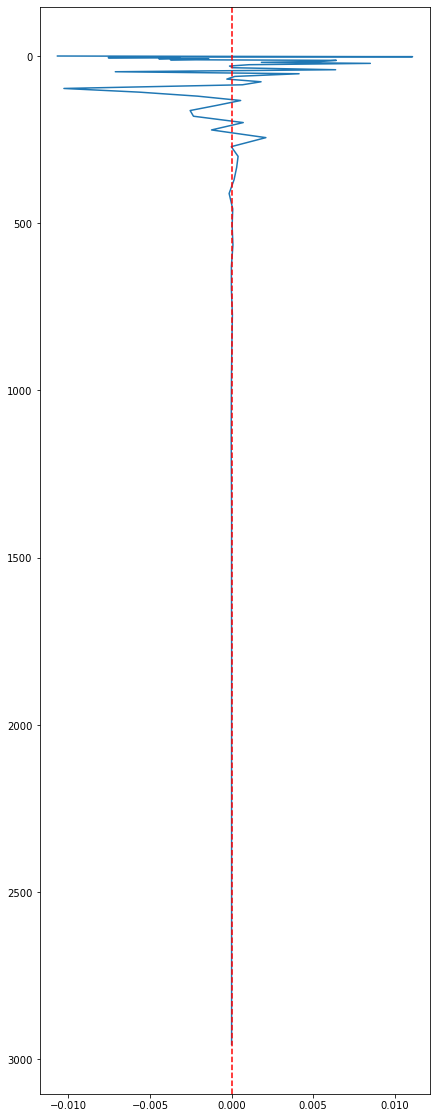

In [35]:
fig, ax = plt.subplots(1,1,figsize = (7,20))

ax.plot(vectors[0]*np.sqrt(values[0]), dyp(d-1))
ax.axvline(0, color='r', linestyle = '--')
ax.invert_yaxis()

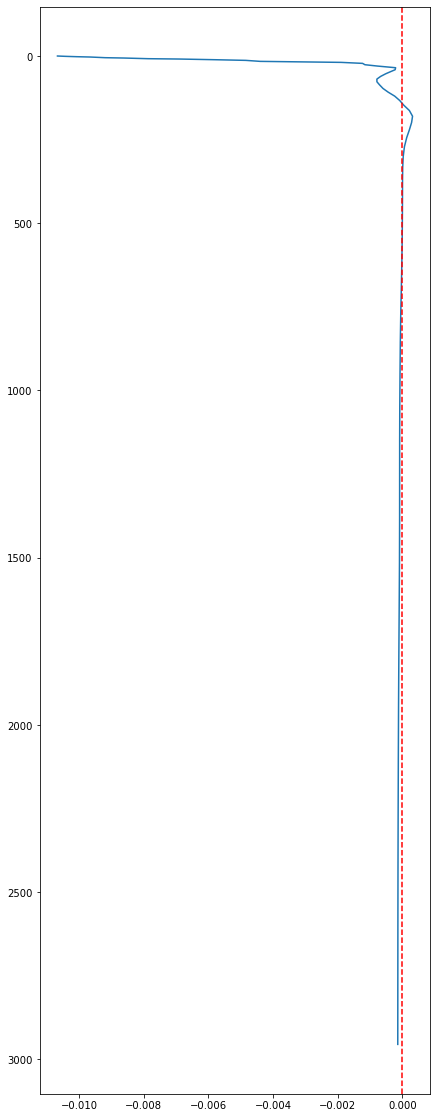

In [36]:
fig, ax = plt.subplots(1,1,figsize = (7,20))

ax.plot(vectors[0]*np.sqrt(values[0]), dyp(d-1))
ax.axvline(0, color='r', linestyle = '--')
ax.invert_yaxis()

In [9]:
x_p = 500
y_p = 500
mbathy = ds.mbathy.isel(y=slice(900,1800), x=slice(200,1400))
mbathy

<xarray.DataArray 'mbathy' (y: 900, x: 1200)>
dask.array<getitem, shape=(900, 1200), dtype=int16, chunksize=(900, 1200), chunktype=numpy.ndarray>
Coordinates:
    time_centered  object ...
    time_counter   object ...
    nav_lat        (y, x) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
Dimensions without coordinates: y, x

In [45]:
d = mbathy.isel(x=500, y=500).values
print(d)
d[d==-1] = 0
#print(d)


61
61


In [39]:
dyp = u.isel(x=x_p, y=y_p, depth = slice(0,d))

In [42]:
dyp

<xarray.DataArray 'vozocrtx' (time_counter: 73, depth: 61)>
dask.array<getitem, shape=(73, 61), dtype=float32, chunksize=(1, 61), chunktype=numpy.ndarray>
Coordinates:
  * depth          (depth) float32 0.5058 1.556 2.668 ... 2.956e+03 3.139e+03
    nav_lat        float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon        float32 dask.array<chunksize=(), meta=np.ndarray>
    time_centered  (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
  * time_counter   (time_counter) object 2000-01-03 12:00:00 ... 2000-12-29 1...
Attributes:
    cell_methods:        time: mean (interval: 360 s)
    interval_operation:  360 s
    interval_write:      5 d
    long_name:           sea_water_x_velocity
    online_operation:    average
    standard_name:       sea_water_x_velocity
    units:               m/s

In [54]:
len(dyp.depth)

61

In [47]:
cov_p = np.cov(dyp, bias=True)

In [49]:
cov_p.shape

(73, 73)

In [50]:
values, vectors = np.linalg.eig(cov_p)
order = values.argsort()[::-1]
values, vectors = values[order], vectors[:, order]

print(values[0])

(0.003562873494877785+0j)


In [51]:
print(values[1])

(0.0008212884899316445+0j)


In [52]:
len(values)

73

In [56]:
i_list = np.arange(0,len(values),20)
j_list = np.arange(0,len(values),20)

In [57]:
i_list

array([ 0, 20, 40, 60])

In [60]:
for i in range(len(i_list)):
    print(i) 

0
1
2
3


In [34]:
# Getting the bottom velocity 
d = ds.mbathy[900:1800,200:1400].values-1
d[d==-1] = 0

d = xr.DataArray(d, dims=['y','x'])


NameError: name 'uvar' is not defined

In [12]:
dyp.shape

(73, 1)

In [17]:
limit = np.zeros((73,2))
limit.shape

(73, 2)